# Crawl Data Twitter > 2000 Tweets
The crawling process was done using Tweet-Harvest. Written by Helmi Satria on  March 30th 2024.



In [ ]:
#@title Twitter Auth Token

twitter_auth_token = 'a33d7b6aac4deb2d037d314585ee6a94kb06a9bbbbn452' # change this auth token

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,630 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,566

In [ ]:
filename = 'iknnetral.csv'

search_keyword = '(("IKN" AND "ibu kota nusantara") OR ("pembangunan ibu kota" AND "Kalimantan Timur") OR "proyek pembangunan pemerintah") since:2024-01-28 until:2024-09-30 lang:id'

limit = 200

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}


⠙⠹⠸⠼⠴⠦Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/iknnetral.csv, renaming to ./tweets-data/iknnetral.old.csv

-- Scrolling... (1)
Filling in keywords: ((IKN AND ibu

 (2) (3)

Your tweets saved to: /content/tweets-data/iknnetral.csv
Total tweets saved: 20


Your tweets saved to: /content/tweets-data/iknnetral.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/iknnetral.csv
Total tweets saved: 58

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/iknnetral.csv
Total tweets saved: 77

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/iknnetral.csv
To

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

NameError: name 'filename' is not defined

In [ ]:
# Cek jumlah data yang didapatkan


num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 208.


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Daftar kolom yang ingin dipertahankan
columns_to_keep = ['full_text', 'created_at']

# Menghapus kolom lain kecuali yang ada di daftar
df = df.loc[:, columns_to_keep]
df.to_csv('ikn netral.csv')


Pre pocessing

In [ ]:
df0 = pd.read_csv('ikn_bersih.csv')
df2 = pd.read_csv('ikn netral.csv')
df0.drop(columns=['Unnamed: 0'],inplace=True)
df2.drop(columns=['Unnamed: 0', 'Unnamed: 3'],inplace=True)


# df0.duplicated().sum()
# df2.duplicated().sum()

In [ ]:
menyatu=pd.concat([df0,df2])
menyatu.reset_index(drop=True,inplace=True)
print(f'sebelum : {menyatu.duplicated().sum()}')
menyatu.drop_duplicates(inplace=True)
print(f'sesudah : {menyatu.duplicated().sum()}')
menyatu.to_csv('iknlabeling.csv')

sebelum : 3
sesudah : 0


In [ ]:
menyatu.dropna(subset=['full_text'], inplace=True)
menyatu['Label'] = menyatu['Label'].astype('category')
menyatu['Label'] = menyatu['Label'].cat.set_categories([0, 1, 2], ordered=True)
menyatu.sort_values(by='Label', inplace=True)
menyatu.reset_index(drop=True, inplace=True)
menyatu


,created_at,full_text,Label
0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan trus masih mau bangun ikn ma...,0
1,Sun Mar 31 11:41:26 +0000 2024,katadata yg ga bisa memilah data klaim dari hu...,0
2,Sun Mar 31 09:26:38 +0000 2024,kiye ramane dadekna tumbal proyek ikn bae lah ...,0
3,Sun Mar 31 07:15:28 +0000 2024,hutan hujan tropis kalimantan yang sangat meng...,0
4,Tue Apr 30 09:41:55 +0000 2024,pembangunan ikn yang mewah dengan segala embel...,0
...,...,...,...
2081,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kenceng to...,NaN
2082,Sun Mar 06 13:31:32 +0000 2022,lha jare wingi blas gk setuju dg ikn lho iki k...,NaN
2083,Sun Mar 06 13:31:10 +0000 2022,pks kalau suruh anis jd konsultan ikn tungu aj...,NaN
2084,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lg neh bro ngabalin posisi kep...,NaN


In [ ]:
df_text = menyatu
df_text['full_text']=df_text['full_text'].str.lower()
df_text

,created_at,full_text,Label
0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan trus masih mau bangun ikn ma...,0
1,Sun Mar 31 11:41:26 +0000 2024,katadata yg ga bisa memilah data klaim dari hu...,0
2,Sun Mar 31 09:26:38 +0000 2024,kiye ramane dadekna tumbal proyek ikn bae lah ...,0
3,Sun Mar 31 07:15:28 +0000 2024,hutan hujan tropis kalimantan yang sangat meng...,0
4,Tue Apr 30 09:41:55 +0000 2024,pembangunan ikn yang mewah dengan segala embel...,0
...,...,...,...
2081,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kenceng to...,NaN
2082,Sun Mar 06 13:31:32 +0000 2022,lha jare wingi blas gk setuju dg ikn lho iki k...,NaN
2083,Sun Mar 06 13:31:10 +0000 2022,pks kalau suruh anis jd konsultan ikn tungu aj...,NaN
2084,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lg neh bro ngabalin posisi kep...,NaN


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 10.5 MB/s eta 0:00:00


In [ ]:
import re
import string
import unicodedata
import emoji
import pandas as pd

# Fungsi untuk membersihkan tweet
def clean_tweet(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+", "", tweet)
    tweet = re.sub(r'([a-zA-Z])([A-Z])', r'\1 \2', tweet)
    # Hapus URL
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub(r'(.)\1+', r'\1', tweet)
    # Hapus angka
    tweet = re.sub(r"\d+", "", tweet)

    # Hapus emoji
    tweet = ''.join(c for c in tweet if not emoji.is_emoji(c))

    # Hapus tanda baca
    tweet = re.sub(r'([a-zA-Z])(\.|,|\?|!|;|:)([a-zA-Z])', r'\1 \3', tweet)
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))

    # Hapus karakter yang tidak diinginkan (ekstra spasi)
    tweet = " ".join(tweet.split())

    # Normalisasi teks untuk menangani karakter asing
    tweet = unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Hapus simbol seperti "#" atau "_"
 # Hapus simbol seperti "#" atau "_"
    tweet = tweet.replace("#", "").replace("_", " ")
    return tweet

df_text['full_text']=df_text['full_text'].apply(clean_tweet)


In [ ]:
df_text.duplicated().sum()
df_text=df_text.drop_duplicates()
df_text.to_csv('menyatu_clean.csv')


In [ ]:
import pandas as pd
import json


# Membaca file txt yang berisi data JSON
def txt_to_csv(txt_file, csv_file):
    try:
        # Membaca isi file TXT
        with open(txt_file, 'r', encoding='utf-8') as file:
            content = file.read()

        # Mengonversi string JSON ke dictionary Python
        slang_dict = json.loads(content)

        # Mengonversi dictionary ke DataFrame
        df = pd.DataFrame(list(slang_dict.items()), columns=['Slang', 'Padanan'])

        # Menyimpan DataFrame ke file CSV
        df.to_csv(csv_file, index=False)

        print(f"Data berhasil disalin ke {csv_file}")

    except FileNotFoundError:
        print(f"File {txt_file} tidak ditemukan.")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Contoh penggunaan
txt_to_csv('combined_slang_words.txt', 'slang_dict.csv')


Data berhasil disalin ke slang_dict.csv


In [ ]:
slang=pd.read_csv('/content/new_kamusalay.csv',encoding='latin-1')
slang

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [ ]:
mc = pd.read_csv('menyatu_clean.csv')

In [ ]:
def slang_to_formal(text, slang_dict):
    text = str(text) # Convert the Series object to a string
    words = text.split()
    formal_words = [slang_dict.get(word, word) for word in words]
    return " ".join(formal_words)
def load_slang_dict_from_csv(csv_file):
    # Load file CSV menjadi DataFrame
    df = pd.read_csv(csv_file,encoding='latin-1')
    # Pastikan kolom benar dan buat kamus slang-to-formal
    if 'anakjakartaasikasik' in df.columns and 'anak jakarta asyik asyik' in df.columns:
        slang_dict = dict(zip(df['anakjakartaasikasik'], df['anak jakarta asyik asyik']))
        return slang_dict
    else:
        raise ValueError("Kolom 'aamiin' dan 'amin' tidak ditemukan dalam file CSV")

slang_dict = load_slang_dict_from_csv('/content/new_kamusalay.csv')  # Sesuaikan path
mc['full_text'] = mc['full_text'].apply(slang_to_formal, slang_dict=slang_dict)
mc.drop(columns=['Unnamed: 0'],inplace=True)



In [ ]:
print(mc['full_text'].head())  # Periksa beberapa baris pertama
print(mc['full_text'].isnull().sum())  # Periksa jumlah NaN
print(mc['full_text'].apply(type).value_counts())  # Periksa tipe data
mc['full_text'] = mc['full_text'].astype(str)  # Ubah menjadi tipe data string

0    baru tau aneh kan terus masih mau bangun ikn m...
1    katadata yang tidak bisa memilah data klaim da...
2    kiye ramane dadekna tumbal proyek ikn baik lah...
3    hutan hujan tropis kalimantan yang sangat meng...
4    pembangunan ikn yang mewah dengan segala embel...
Name: full_text, dtype: object
0
full_text
<class 'str'>    2086
Name: count, dtype: int64


In [ ]:
!pip install nltk

In [ ]:
import nltk

# Unduh dataset 'punkt'
nltk.download('punkt_tab')

# Fungsi tokenisasi menggunakan NLTK
from nltk.tokenize import word_tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

mc['tokenize text']=mc['full_text'].apply(tokenize)
mct = mc #mct = menyatu-clean-tokenize
mct

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,created_at,full_text,Label,tokenize text
0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan terus masih mau bangun ikn m...,0.0,"[baru, tau, aneh, kan, terus, masih, mau, bang..."
1,Sun Mar 31 11:41:26 +0000 2024,katadata yang tidak bisa memilah data klaim da...,0.0,"[katadata, yang, tidak, bisa, memilah, data, k..."
2,Sun Mar 31 09:26:38 +0000 2024,kiye ramane dadekna tumbal proyek ikn baik lah...,0.0,"[kiye, ramane, dadekna, tumbal, proyek, ikn, b..."
3,Sun Mar 31 07:15:28 +0000 2024,hutan hujan tropis kalimantan yang sangat meng...,0.0,"[hutan, hujan, tropis, kalimantan, yang, sanga..."
4,Tue Apr 30 09:41:55 +0000 2024,pembangunan ikn yang mewah dengan segala embel...,0.0,"[pembangunan, ikn, yang, mewah, dengan, segala..."
...,...,...,...,...
2081,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kencang to...,NaN,"[oposisi, yang, tidak, tahu, malu, paling, ken..."
2082,Sun Mar 06 13:31:32 +0000 2022,lah jare wingi sama sekali tidak setuju dengan...,NaN,"[lah, jare, wingi, sama, sekali, tidak, setuju..."
2083,Sun Mar 06 13:31:10 +0000 2022,partai keadilan sejahtera kalau suruh anis jad...,NaN,"[partai, keadilan, sejahtera, kalau, suruh, an..."
2084,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lagi nih bro ngabalin posisi k...,NaN,"[wih, baru, muncul, lagi, nih, bro, ngabalin, ..."


In [ ]:
!pip install Sastrawi

In [ ]:

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Buat objek stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Definisikan fungsi untuk menghapus stopword
def remove_stopwords(text):
    if isinstance(text, list):  # Jika input berupa list token
        text = " ".join(text)
    elif not isinstance(text, str):  # Tangani input yang bukan string
        return ""
    text = stopword_remover.remove(text)  # Hapus stopword
    return text.split()  # Kembalikan dalam bentuk list token

mct['stop removal text']= mct['tokenize text'].apply(remove_stopwords)
mcts = mct #menyatu-clean-tokenize-stopwords
mcts


,created_at,full_text,Label,tokenize text,stop removal text
0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan terus masih mau bangun ikn m...,0.0,"[baru, tau, aneh, kan, terus, masih, mau, bang...","[baru, tau, aneh, kan, terus, mau, bangun, ikn..."
1,Sun Mar 31 11:41:26 +0000 2024,katadata yang tidak bisa memilah data klaim da...,0.0,"[katadata, yang, tidak, bisa, memilah, data, k...","[katadata, tidak, memilah, data, klaim, hutan,..."
2,Sun Mar 31 09:26:38 +0000 2024,kiye ramane dadekna tumbal proyek ikn baik lah...,0.0,"[kiye, ramane, dadekna, tumbal, proyek, ikn, b...","[kiye, ramane, dadekna, tumbal, proyek, ikn, b..."
3,Sun Mar 31 07:15:28 +0000 2024,hutan hujan tropis kalimantan yang sangat meng...,0.0,"[hutan, hujan, tropis, kalimantan, yang, sanga...","[hutan, hujan, tropis, kalimantan, sangat, men..."
4,Tue Apr 30 09:41:55 +0000 2024,pembangunan ikn yang mewah dengan segala embel...,0.0,"[pembangunan, ikn, yang, mewah, dengan, segala...","[pembangunan, ikn, mewah, segala, embelembelny..."
...,...,...,...,...,...
2081,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kencang to...,NaN,"[oposisi, yang, tidak, tahu, malu, paling, ken...","[oposisi, tidak, tahu, malu, paling, kencang, ..."
2082,Sun Mar 06 13:31:32 +0000 2022,lah jare wingi sama sekali tidak setuju dengan...,NaN,"[lah, jare, wingi, sama, sekali, tidak, setuju...","[lah, jare, wingi, sama, sekali, setuju, ikn, ..."
2083,Sun Mar 06 13:31:10 +0000 2022,partai keadilan sejahtera kalau suruh anis jad...,NaN,"[partai, keadilan, sejahtera, kalau, suruh, an...","[partai, keadilan, sejahtera, kalau, suruh, an..."
2084,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lagi nih bro ngabalin posisi k...,NaN,"[wih, baru, muncul, lagi, nih, bro, ngabalin, ...","[wih, baru, muncul, nih, bro, ngabalin, posisi..."


In [ ]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
# Create a stemmer object using the factory
stemmer = factory.create_stemmer()

def stem_text(text):
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return ' '.join(stemmed_tokens)

mcts['stemmed_text'] = mcts['stop removal text'].apply(stem_text)
mctss = mcts #menyatu-clean-toknize-stopwords-stemming
mctss

,created_at,full_text,Label,tokenize text,stop removal text,stemmed_text
0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan terus masih mau bangun ikn m...,0.0,"[baru, tau, aneh, kan, terus, masih, mau, bang...","[baru, tau, aneh, kan, terus, mau, bangun, ikn...",baru tau aneh kan terus mau bangun ikn makan g...
1,Sun Mar 31 11:41:26 +0000 2024,katadata yang tidak bisa memilah data klaim da...,0.0,"[katadata, yang, tidak, bisa, memilah, data, k...","[katadata, tidak, memilah, data, klaim, hutan,...",katadata tidak mem data klaim hutan terus bila...
2,Sun Mar 31 09:26:38 +0000 2024,kiye ramane dadekna tumbal proyek ikn baik lah...,0.0,"[kiye, ramane, dadekna, tumbal, proyek, ikn, b...","[kiye, ramane, dadekna, tumbal, proyek, ikn, b...",kiye ramane dadekna tumbal proyek ikn baik lah...
3,Sun Mar 31 07:15:28 +0000 2024,hutan hujan tropis kalimantan yang sangat meng...,0.0,"[hutan, hujan, tropis, kalimantan, yang, sanga...","[hutan, hujan, tropis, kalimantan, sangat, men...",hutan hujan tropis kalimantan sangat khawatir ...
4,Tue Apr 30 09:41:55 +0000 2024,pembangunan ikn yang mewah dengan segala embel...,0.0,"[pembangunan, ikn, yang, mewah, dengan, segala...","[pembangunan, ikn, mewah, segala, embelembelny...",bangun ikn mewah segala embelembelnya bukan so...
...,...,...,...,...,...,...
2081,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kencang to...,NaN,"[oposisi, yang, tidak, tahu, malu, paling, ken...","[oposisi, tidak, tahu, malu, paling, kencang, ...",oposisi tidak tahu malu paling kencang tolak i...
2082,Sun Mar 06 13:31:32 +0000 2022,lah jare wingi sama sekali tidak setuju dengan...,NaN,"[lah, jare, wingi, sama, sekali, tidak, setuju...","[lah, jare, wingi, sama, sekali, setuju, ikn, ...",lah jare wing sama sekali tuju ikn lo kok sodo...
2083,Sun Mar 06 13:31:10 +0000 2022,partai keadilan sejahtera kalau suruh anis jad...,NaN,"[partai, keadilan, sejahtera, kalau, suruh, an...","[partai, keadilan, sejahtera, kalau, suruh, an...",partai adil sejahtera kalau suruh anis jadi ko...
2084,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lagi nih bro ngabalin posisi k...,NaN,"[wih, baru, muncul, lagi, nih, bro, ngabalin, ...","[wih, baru, muncul, nih, bro, ngabalin, posisi...",wih baru muncul nih bro ngabalin posisi kepala...


In [ ]:
mctss.to_csv('after prepocessing IKN.csv')

split yang sudah berlabel

In [ ]:
import pandas as pd

data = pd.read_csv('/content/after prepocessing IKN.csv')

In [ ]:

udalabel = data[data['Label'].notna()]
# udalabel.dropna(inplace=True)
belumlabel = data[data['Label'].isna()]
# belumlabel.dropna(inplace=True)

In [ ]:
udalabel['Label'].value_counts()

,count
Label,
2.0,209
0.0,190
1.0,187


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan data menjadi fitur (full_text) dan target (label)
X = udalabel['stemmed_text']
y = udalabel['Label']

# Preprocessing teks dengan TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks

# Bagi data menjadi training dan testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tfidf, y, test_size=0.2, random_state=45)

# Latih model Multinomial Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train1, y_train1)

# Prediksi dan evaluasi model
y_pred1 = classifier.predict(X_test1)

# Evaluasi akurasi dan laporan klasifikasi
akurasi1 = accuracy_score(y_test1, y_pred1)
print(f'Akurasi prediksi: {akurasi1 * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test1, y_pred1))


Akurasi prediksi: 73.73%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78        37
         1.0       0.64      0.77      0.70        35
         2.0       0.75      0.72      0.73        46

    accuracy                           0.74       118
   macro avg       0.75      0.74      0.74       118
weighted avg       0.75      0.74      0.74       118



In [ ]:
df_tfidf = pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out())
df_tfidf.head(10)

,abdi,abipraya,abrek,absurd,absurditas,acara,ada,adab,adalah,adan,...,york,ysbtdjltspkt,yudhoyono,yudikatif,yuk,zalim,zaman,zoh,zulfate,zulfikar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.376233,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

from sklearn.naive_bayes import GaussianNB


# Pisahkan data menjadi fitur (full_text) dan target (label)
X = udalabel['stemmed_text']
y = udalabel['Label']

# Preprocessing teks dengan TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks

# Bagi data menjadi training dan testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf, y, test_size=0.2, random_state=45)

# Latih model Multinomial Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train2, y_train2)

# Prediksi dan evaluasi model
y_pred2 = classifier.predict(X_test2)

# Evaluasi akurasi dan laporan klasifikasi
akurasi2 = accuracy_score(y_test2, y_pred2)
print(f'Akurasi prediksi: {akurasi2 * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test2, y_pred2))


Akurasi prediksi: 61.86%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.58      0.57      0.58        37
         1.0       0.62      0.69      0.65        35
         2.0       0.65      0.61      0.63        46

    accuracy                           0.62       118
   macro avg       0.62      0.62      0.62       118
weighted avg       0.62      0.62      0.62       118



In [ ]:
from sklearn import svm
from sklearn.svm import SVC


X = udalabel['stemmed_text']
y = udalabel['Label']


vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=45)


clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi prediksi: 73.73%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        37
         1.0       0.65      0.80      0.72        35
         2.0       0.81      0.63      0.71        46

    accuracy                           0.74       118
   macro avg       0.74      0.75      0.74       118
weighted avg       0.75      0.74      0.74       118



In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2


X = udalabel['stemmed_text']
y = udalabel['Label']


vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,stratify=y, test_size=0.2, random_state=45)


clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi prediksi: 72.88%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        38
         1.0       0.69      0.66      0.68        38
         2.0       0.71      0.81      0.76        42

    accuracy                           0.73       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.73      0.73      0.73       118



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = udalabel['stemmed_text']
y = udalabel['Label']


vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,stratify=y, test_size=0.2, random_state=45)

clf = RandomForestClassifier(max_depth = 30, n_estimators=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2,random_state=45)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi prediksi: 79.66%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        38
         1.0       0.87      0.68      0.76        38
         2.0       0.73      0.86      0.79        42

    accuracy                           0.80       118
   macro avg       0.81      0.79      0.80       118
weighted avg       0.80      0.80      0.80       118



In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = udalabel['stemmed_text']
y = udalabel['Label']


vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,stratify=y, test_size=0.2, random_state=45)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi prediksi: 72.03%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.86      0.66      0.75        38
         1.0       0.72      0.61      0.66        38
         2.0       0.65      0.88      0.75        42

    accuracy                           0.72       118
   macro avg       0.74      0.71      0.72       118
weighted avg       0.74      0.72      0.72       118



In [ ]:
import lightgbm as lgb


X = udalabel['stemmed_text']
y = udalabel['Label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.2, random_state=45)

clf = lgb.LGBMClassifier(n_estimators=12)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 58
[LightGBM] [Info] Start training from score -1.124588
[LightGBM] [Info] Start training from score -1.144522
[LightGBM] [Info] Start training from score -1.030474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import xgboost as xgb


X = udalabel['stemmed_text']
y = udalabel['Label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.2, random_state=45)

clf = xgb.XGBClassifier(n_estimators=10,random_state=45)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi prediksi: 79.66%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        38
         1.0       0.82      0.71      0.76        38
         2.0       0.75      0.86      0.80        42

    accuracy                           0.80       118
   macro avg       0.80      0.79      0.80       118
weighted avg       0.80      0.80      0.80       118



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

X = udalabel['stemmed_text']
y = udalabel['Label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.2, random_state=45)

clf = cb.CatBoostClassifier(n_estimators=10, verbose=0,random_state=45)  # Menggunakan CatBoostClassifier
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi prediksi: 74.58%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77        38
         1.0       0.74      0.66      0.69        38
         2.0       0.69      0.86      0.77        42

    accuracy                           0.75       118
   macro avg       0.76      0.74      0.74       118
weighted avg       0.75      0.75      0.74       118



In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.pipeline import Pipeline


X = udalabel['stemmed_text']
y = udalabel['Label']


vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()  # Representasi numerik dari teks


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,stratify=y, test_size=0.2, random_state=45)
nca = NeighborhoodComponentsAnalysis(random_state=45)
knn = KNeighborsClassifier(n_neighbors=3)



nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)


y_pred = nca_pipe.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi prediksi: 80.51%
Laporan klasifikasi:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        38
         1.0       1.00      0.68      0.81        38
         2.0       0.69      0.86      0.77        42

    accuracy                           0.81       118
   macro avg       0.84      0.80      0.81       118
weighted avg       0.83      0.81      0.81       118



In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

# Definisikan parameter yang ingin diuji

X = udalabel['stemmed_text']
y = udalabel['Label']

# Preprocessing teks dengan TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.2, random_state=45)

# Definisikan model
nca = NeighborhoodComponentsAnalysis(n_components=10,random_state=42)
knn = KNeighborsClassifier(n_neighbors=10,metric='manhattan')

# Buat pipeline
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)


y_pred_train = nca_pipe.predict(X_train)  # Prediksi untuk data training
y_pred_test = nca_pipe.predict(X_test)    # Prediksi untuk data testing

# Akurasi dan laporan klasifikasi untuk data training
akurasi_train = accuracy_score(y_train, y_pred_train)
print(f'Akurasi prediksi train: {akurasi_train * 100:.2f}%')
print("Laporan klasifikasi train:")
print(classification_report(y_train, y_pred_train))

# Akurasi dan laporan klasifikasi untuk data testing
akurasi_test = accuracy_score(y_test, y_pred_test)
print(f'Akurasi prediksi test: {akurasi_test * 100:.2f}%')
print("Laporan klasifikasi test:")
print(classification_report(y_test, y_pred_test))

# Menampilkan dimensi dan jumlah data
print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")
print(f"Jumlah data training: {y_train.shape[0]}")
print(f"Jumlah data testing: {y_test.shape[0]}")




Akurasi prediksi train: 96.37%
Laporan klasifikasi train:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       152
         1.0       0.99      0.93      0.96       149
         2.0       0.95      0.98      0.96       167

    accuracy                           0.96       468
   macro avg       0.97      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468

Akurasi prediksi test: 83.90%
Laporan klasifikasi test:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        38
         1.0       0.97      0.76      0.85        38
         2.0       0.77      0.86      0.81        42

    accuracy                           0.84       118
   macro avg       0.85      0.84      0.84       118
weighted avg       0.85      0.84      0.84       118

Dimensi X_train: (468, 2367)
Dimensi X_test: (118, 2367)
Jumlah data training: 468
Jumlah data testing: 118


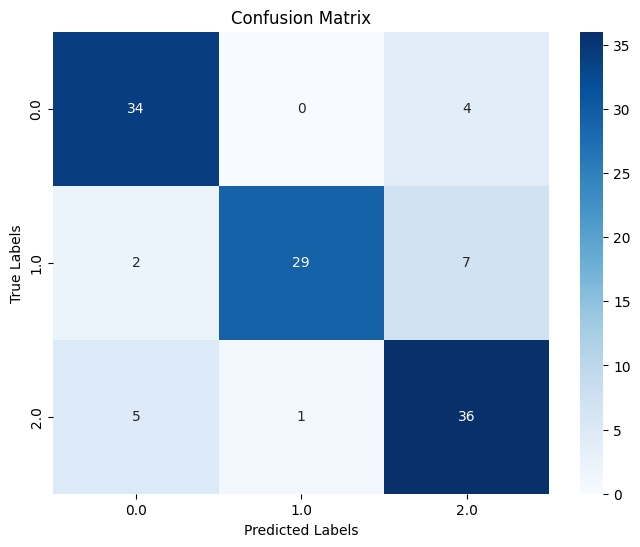

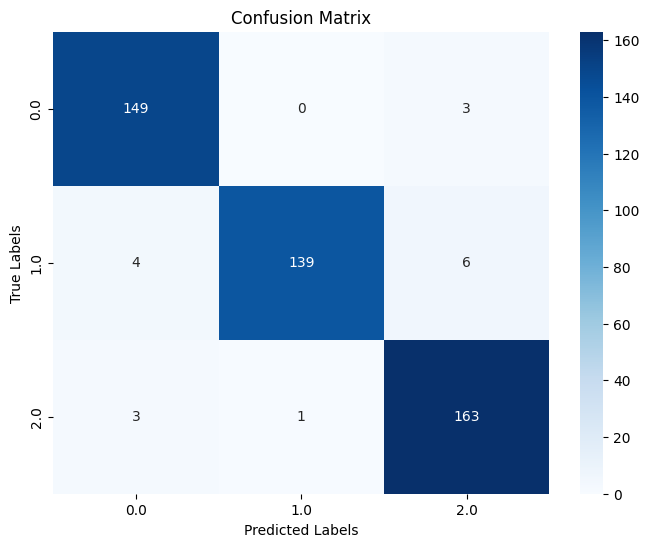

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import numpy as np

def confusiin(conf_matrix):
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()
Test_CMatrix = confusion_matrix(y_test, y_pred_test)
confusiin(Test_CMatrix)
Train_CMatrix = confusion_matrix(y_train, y_pred_train)
confusiin(Train_CMatrix)

In [ ]:
import joblib
joblib.dump(nca_pipe, 'model_knn_nca.pkl')


['model_knn_nca.pkl']

In [ ]:
y_combined = np.concatenate((y_train, y_test))
y_pred_combined = np.concatenate((y_pred_train, y_pred_test))
akurasi_test = accuracy_score(y_combined, y_pred_combined)
print(f'Akurasi prediksi total: {akurasi_test * 100:.2f}%')
print("Laporan klasifikasi test:")
print(classification_report(y_combined, y_pred_combined))

Akurasi prediksi total: 93.86%
Laporan klasifikasi test:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       190
         1.0       0.99      0.90      0.94       187
         2.0       0.91      0.95      0.93       209

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586



Confusion Matrix:
[[183   0   7]
 [  6 168  13]
 [  8   2 199]]


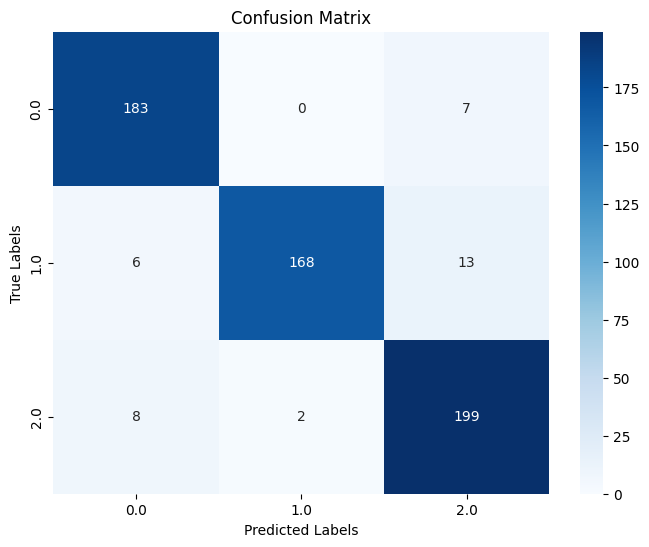

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_combined, y_pred_combined)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# penerapan ke data belum terlabel

In [ ]:
# Misalkan data baru yang belum terlabel berada dalam variabel 'new_data'
new_data = belumlabel['stemmed_text']

# Preprocessing teks baru menggunakan TF-IDF yang sudah dilatih
new_data_tfidf = vectorizer.transform(new_data).toarray()

# Gunakan model yang sudah dilatih (nca_pipe) untuk melakukan prediksi pada data baru
y_prediksi_new = nca_pipe.predict(new_data_tfidf)

belumlabel['Label'] = y_prediksi_new
belumlabel.sort_values(by='Label')
belumlabel.to_csv('IKN hasil knn.csv')

<ipython-input-21-b0c0b3f9221b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belumlabel['Label'] = y_prediksi_new


In [ ]:
labelknn=pd.read_csv('IKN hasil knn.csv')
labelknn.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

,created_at,full_text,Label,tokenize text,stop removal text,stemmed_text
0,Mon Sep 30 19:14:06 +0000 2024,yang butuh ikn itu siapa kunyuk tidak ada yang...,0.0,"['yang', 'butuh', 'ikn', 'itu', 'siapa', 'kuny...","['butuh', 'ikn', 'siapa', 'kunyuk', 'ada', 'bu...",butuh ikn siapa kunyuk ada butuh bajitol kroni...
1,Mon Sep 30 17:24:27 +0000 2024,enak benar didukung seluruh rakyat bangun ikn ...,1.0,"['enak', 'benar', 'didukung', 'seluruh', 'raky...","['enak', 'benar', 'didukung', 'seluruh', 'raky...",enak benar dukung seluruh rakyat bangun ikn he...
2,Mon Sep 30 16:34:28 +0000 2024,wisata mangkrak,0.0,"['wisata', 'mangkrak']","['wisata', 'mangkrak']",wisata mangkrak
3,Mon Sep 30 16:08:23 +0000 2024,infrastruktur untuk infrastruktur ikn calon ma...,0.0,"['infrastruktur', 'untuk', 'infrastruktur', 'i...","['infrastruktur', 'infrastruktur', 'ikn', 'cal...",infrastruktur infrastruktur ikn calon mangkrak...
4,Mon Sep 30 15:47:14 +0000 2024,lah mengebu kejar tayang bikin ikn buat apa di...,0.0,"['lah', 'mengebu', 'kejar', 'tayang', 'bikin',...","['lah', 'mengebu', 'kejar', 'tayang', 'bikin',...",lah mengebu kejar tayang bikin ikn buat apa am...
...,...,...,...,...,...,...
1495,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kencang to...,2.0,"['oposisi', 'yang', 'tidak', 'tahu', 'malu', '...","['oposisi', 'tidak', 'tahu', 'malu', 'paling',...",oposisi tidak tahu malu paling kencang tolak i...
1496,Sun Mar 06 13:31:32 +0000 2022,lah jare wingi sama sekali tidak setuju dengan...,0.0,"['lah', 'jare', 'wingi', 'sama', 'sekali', 'ti...","['lah', 'jare', 'wingi', 'sama', 'sekali', 'se...",lah jare wing sama sekali tuju ikn lo kok sodo...
1497,Sun Mar 06 13:31:10 +0000 2022,partai keadilan sejahtera kalau suruh anis jad...,0.0,"['partai', 'keadilan', 'sejahtera', 'kalau', '...","['partai', 'keadilan', 'sejahtera', 'kalau', '...",partai adil sejahtera kalau suruh anis jadi ko...
1498,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lagi nih bro ngabalin posisi k...,0.0,"['wih', 'baru', 'muncul', 'lagi', 'nih', 'bro'...","['wih', 'baru', 'muncul', 'nih', 'bro', 'ngaba...",wih baru muncul nih bro ngabalin posisi kepala...


In [ ]:

donelabelbang=pd.concat([udalabel,labelknn])
donelabelbang.reset_index(drop=True,inplace=True)
donelabelbang.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
donelabelbang

,Unnamed: 0,created_at,full_text,Label,tokenize text,stop removal text,stemmed_text,Unnamed: 0.1
0,0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan terus masih mau bangun ikn m...,0.0,"['baru', 'tau', 'aneh', 'kan', 'terus', 'masih...","['baru', 'tau', 'aneh', 'kan', 'terus', 'mau',...",baru tau aneh kan terus mau bangun ikn makan g...,NaN
1,1,Tue Mar 26 15:43:32 +0000 2024,intinya tetap salah pemerintah sih kenapa akse...,0.0,"['intinya', 'tetap', 'salah', 'pemerintah', 's...","['intinya', 'tetap', 'salah', 'pemerintah', 's...",inti tetap salah perintah sih akses jalan jele...,NaN
2,2,Wed Jan 31 04:27:47 +0000 2024,maksudnya berkelanjutan fod estate gagal hilir...,0.0,"['maksudnya', 'berkelanjutan', 'fod', 'estate'...","['maksudnya', 'berkelanjutan', 'fod', 'estate'...",maksud lanjut fod estate gagal hilir nikel ruw...,NaN
3,3,Thu Mar 28 02:29:49 +0000 2024,lah kan itu salah satu dosanya apa mau disebut...,0.0,"['lah', 'kan', 'itu', 'salah', 'satu', 'dosany...","['lah', 'kan', 'salah', 'satu', 'dosanya', 'ap...",lah kan salah satu dosa apa mau sebut semua fo...,NaN
4,4,Wed Mar 27 08:40:25 +0000 2024,ribet karena ada ikn bayangkan ikn gagal,0.0,"['ribet', 'karena', 'ada', 'ikn', 'bayangkan',...","['ribet', 'ada', 'ikn', 'bayangkan', 'ikn', 'g...",ribet ada ikn bayang ikn gagal,NaN
...,...,...,...,...,...,...,...,...
2081,2081,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kencang to...,2.0,"['oposisi', 'yang', 'tidak', 'tahu', 'malu', '...","['oposisi', 'tidak', 'tahu', 'malu', 'paling',...",oposisi tidak tahu malu paling kencang tolak i...,2081.0
2082,2082,Sun Mar 06 13:31:32 +0000 2022,lah jare wingi sama sekali tidak setuju dengan...,0.0,"['lah', 'jare', 'wingi', 'sama', 'sekali', 'ti...","['lah', 'jare', 'wingi', 'sama', 'sekali', 'se...",lah jare wing sama sekali tuju ikn lo kok sodo...,2082.0
2083,2083,Sun Mar 06 13:31:10 +0000 2022,partai keadilan sejahtera kalau suruh anis jad...,0.0,"['partai', 'keadilan', 'sejahtera', 'kalau', '...","['partai', 'keadilan', 'sejahtera', 'kalau', '...",partai adil sejahtera kalau suruh anis jadi ko...,2083.0
2084,2084,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lagi nih bro ngabalin posisi k...,0.0,"['wih', 'baru', 'muncul', 'lagi', 'nih', 'bro'...","['wih', 'baru', 'muncul', 'nih', 'bro', 'ngaba...",wih baru muncul nih bro ngabalin posisi kepala...,2084.0


In [ ]:

donelabelbang.drop_duplicates(subset='stemmed_text', keep='first', inplace=True)
a= donelabelbang.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
a.to_csv('IKN hasil knn fix.csv')

In [ ]:
data_ikn = pd.read_csv('IKN hasil knn fix.csv')

In [ ]:
b = data_ikn.drop(['Unnamed: 0'], axis = 1)
b

,created_at,full_text,Label,tokenize text,stop removal text,stemmed_text
0,Wed Jan 31 21:21:49 +0000 2024,baru tau aneh kan terus masih mau bangun ikn m...,0.0,"['baru', 'tau', 'aneh', 'kan', 'terus', 'masih...","['baru', 'tau', 'aneh', 'kan', 'terus', 'mau',...",baru tau aneh kan terus mau bangun ikn makan g...
1,Tue Mar 26 15:43:32 +0000 2024,intinya tetap salah pemerintah sih kenapa akse...,0.0,"['intinya', 'tetap', 'salah', 'pemerintah', 's...","['intinya', 'tetap', 'salah', 'pemerintah', 's...",inti tetap salah perintah sih akses jalan jele...
2,Wed Jan 31 04:27:47 +0000 2024,maksudnya berkelanjutan fod estate gagal hilir...,0.0,"['maksudnya', 'berkelanjutan', 'fod', 'estate'...","['maksudnya', 'berkelanjutan', 'fod', 'estate'...",maksud lanjut fod estate gagal hilir nikel ruw...
3,Thu Mar 28 02:29:49 +0000 2024,lah kan itu salah satu dosanya apa mau disebut...,0.0,"['lah', 'kan', 'itu', 'salah', 'satu', 'dosany...","['lah', 'kan', 'salah', 'satu', 'dosanya', 'ap...",lah kan salah satu dosa apa mau sebut semua fo...
4,Wed Mar 27 08:40:25 +0000 2024,ribet karena ada ikn bayangkan ikn gagal,0.0,"['ribet', 'karena', 'ada', 'ikn', 'bayangkan',...","['ribet', 'ada', 'ikn', 'bayangkan', 'ikn', 'g...",ribet ada ikn bayang ikn gagal
...,...,...,...,...,...,...
2049,Sun Mar 06 13:31:48 +0000 2022,oposisi yang tidak tahu malu paling kencang to...,2.0,"['oposisi', 'yang', 'tidak', 'tahu', 'malu', '...","['oposisi', 'tidak', 'tahu', 'malu', 'paling',...",oposisi tidak tahu malu paling kencang tolak i...
2050,Sun Mar 06 13:31:32 +0000 2022,lah jare wingi sama sekali tidak setuju dengan...,0.0,"['lah', 'jare', 'wingi', 'sama', 'sekali', 'ti...","['lah', 'jare', 'wingi', 'sama', 'sekali', 'se...",lah jare wing sama sekali tuju ikn lo kok sodo...
2051,Sun Mar 06 13:31:10 +0000 2022,partai keadilan sejahtera kalau suruh anis jad...,0.0,"['partai', 'keadilan', 'sejahtera', 'kalau', '...","['partai', 'keadilan', 'sejahtera', 'kalau', '...",partai adil sejahtera kalau suruh anis jadi ko...
2052,Sun Mar 06 13:30:18 +0000 2022,wih baru muncul lagi nih bro ngabalin posisi k...,0.0,"['wih', 'baru', 'muncul', 'lagi', 'nih', 'bro'...","['wih', 'baru', 'muncul', 'nih', 'bro', 'ngaba...",wih baru muncul nih bro ngabalin posisi kepala...


<ipython-input-27-8ad3917d1221>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  b['created_at'] = pd.to_datetime(b['created_at'], errors='coerce')


<Figure size 1400x700 with 0 Axes>

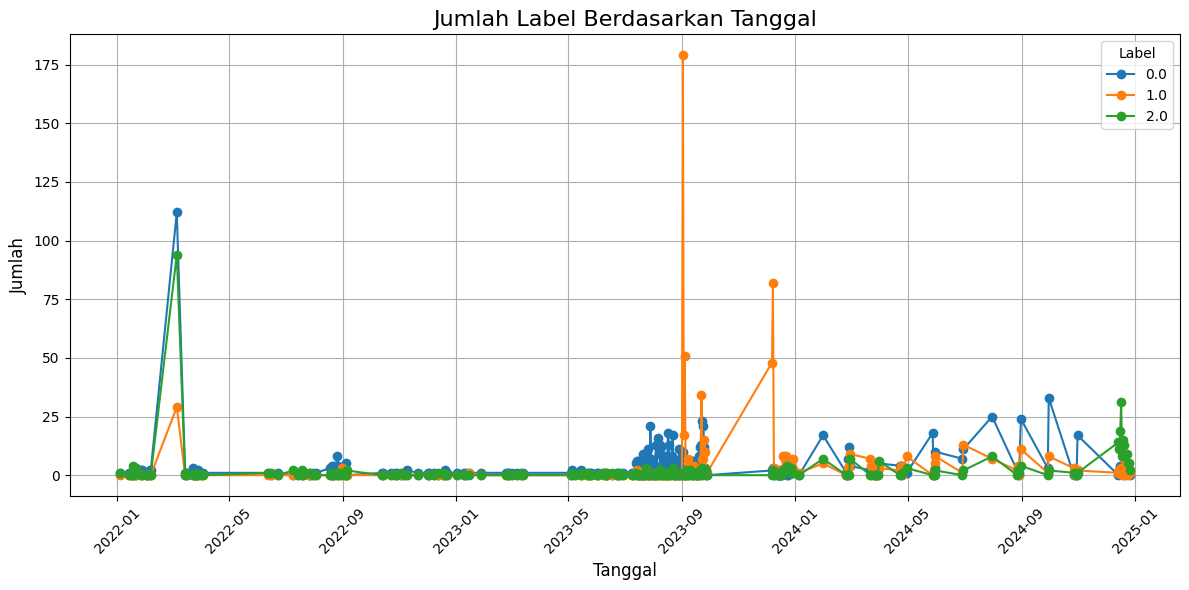

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan data Anda sudah ada dalam DataFrame dengan nama 'udalabel'

# 1. Pastikan kolom 'created_at' dalam format datetime
b['created_at'] = pd.to_datetime(b['created_at'], errors='coerce')

# 2. Kelompokkan berdasarkan tanggal dan label untuk menghitung jumlahnya
# Menggunakan '.dt.date' untuk hanya mengambil tanggal (tanpa waktu)
label_counts_by_date = b.groupby([b['created_at'].dt.date, 'Label']).size().reset_index(name='count')

# 3. Pivot tabel untuk memudahkan visualisasi
pivot_table = label_counts_by_date.pivot_table(index='created_at', columns='Label', values='count', fill_value=0)

# 4. Plotkan data menggunakan seaborn
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))

# 5. Atur grafik
plt.title('Jumlah Label Berdasarkan Tanggal', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Tampilkan grafik
plt.tight_layout()
plt.show()


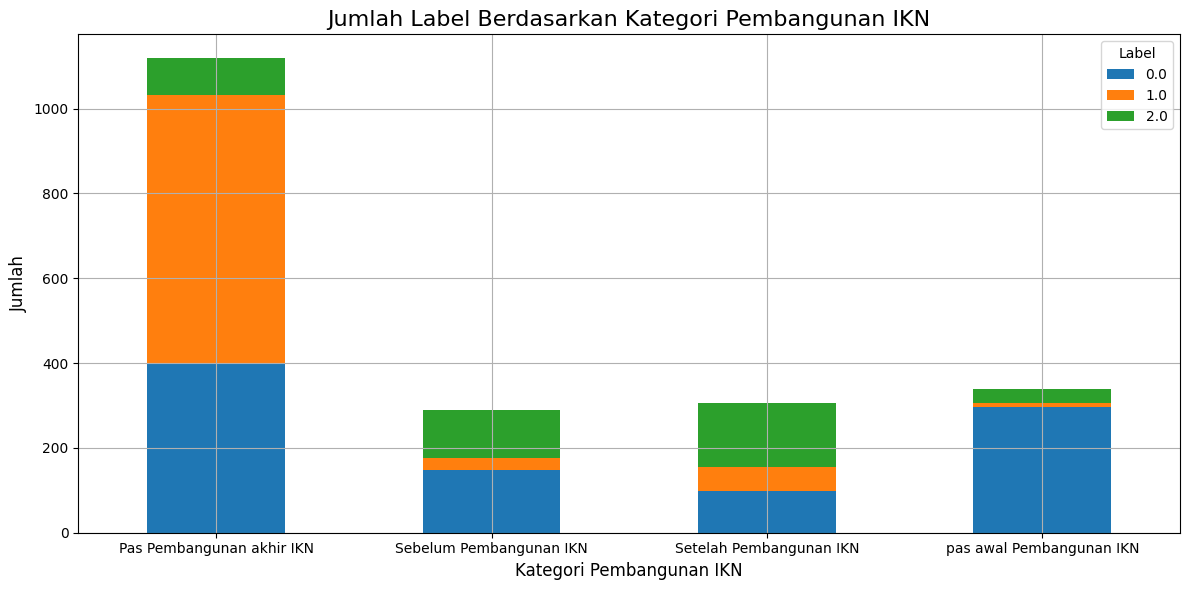

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan data Anda sudah ada dalam DataFrame dengan nama 'b'

# 1. Pastikan kolom 'created_at' dalam format datetime
b['created_at'] = pd.to_datetime(b['created_at'], errors='coerce').dt.tz_localize(None)

# 2. Tentukan tanggal pembangunan IKN (tanpa time zone)
tanggal_pembangunan_awal = pd.to_datetime('2022-08-15')
tanggal_pembangunan_2023 = pd.to_datetime('2023-08-17')
tanggal_pembangunan_akhir = pd.to_datetime('2024-08-17')

# 3. Tambahkan kolom kategori berdasarkan tanggal
def kategori_pembangunan(tanggal):
    if tanggal < tanggal_pembangunan_awal:
        return 'Sebelum Pembangunan IKN'
    elif tanggal >= tanggal_pembangunan_awal and tanggal <= tanggal_pembangunan_2023:
        return 'pas awal Pembangunan IKN'
    elif tanggal > tanggal_pembangunan_2023 and tanggal <= tanggal_pembangunan_akhir:
        return 'Pas Pembangunan akhir IKN'
    else:
        return 'Setelah Pembangunan IKN'

# Menggunakan apply untuk menerapkan fungsi kategori_pembangunan pada setiap baris tanggal
b['kategori_pembangunan'] = b['created_at'].apply(kategori_pembangunan)

# 4. Kelompokkan data berdasarkan kategori dan label
kategori_counts = b.groupby(['kategori_pembangunan', 'Label']).size().reset_index(name='count')

# 5. Pivot tabel untuk memudahkan visualisasi
pivot_table = kategori_counts.pivot_table(index='kategori_pembangunan', columns='Label', values='count', fill_value=0)

# 6. Visualisasi
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# 7. Atur grafik
plt.title('Jumlah Label Berdasarkan Kategori Pembangunan IKN', fontsize=16)
plt.xlabel('Kategori Pembangunan IKN', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True)

# Tampilkan grafik
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

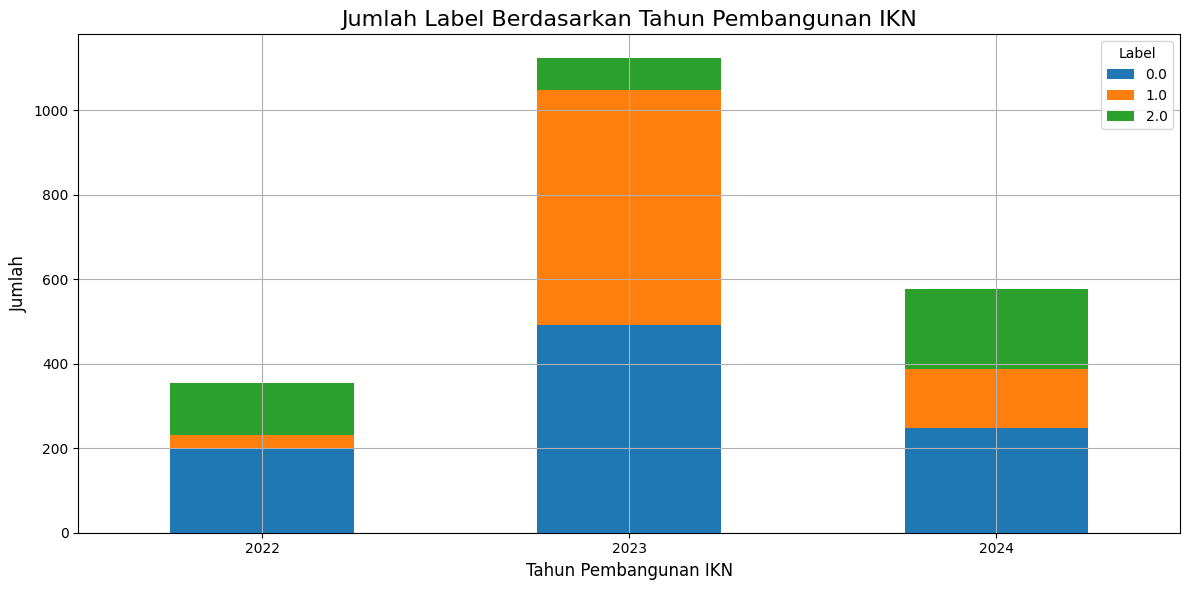

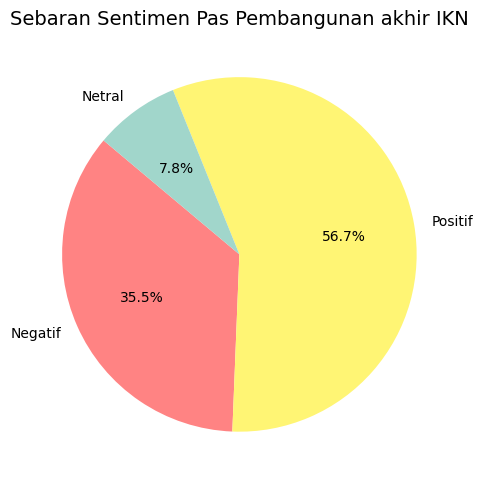

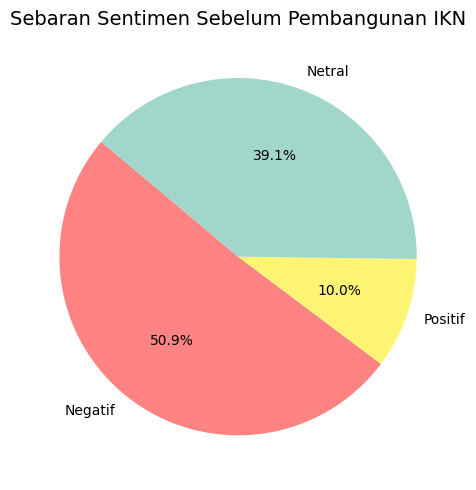

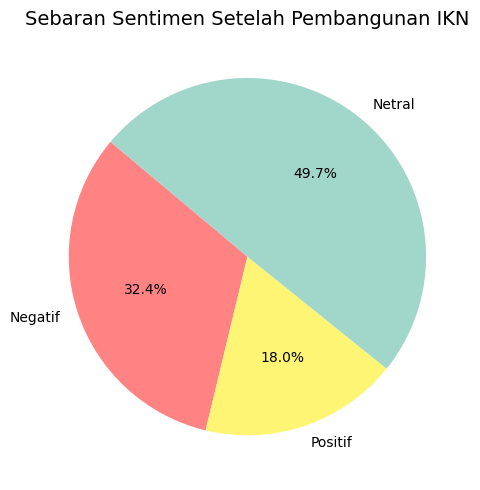

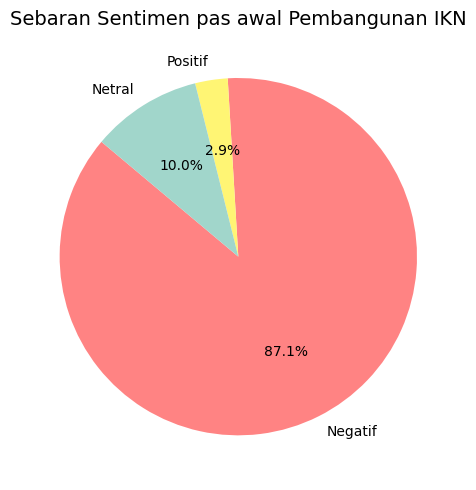

In [ ]:
import matplotlib.pyplot as plt

# 1. Kelompokkan data berdasarkan kategori pembangunan dan label
kategori_counts = b.groupby(['kategori_pembangunan', 'Label']).size().reset_index(name='count')

# 2. Loop melalui setiap periode untuk membuat pie plot
periode_labels = kategori_counts['kategori_pembangunan'].unique()

# Warna untuk setiap label (0: Negatif, 1: Positif, 2: Netral)
colors = ['#FF8383', '#FFF574', '#A1D6CB']

# Buat pie plot untuk setiap periode
for periode in periode_labels:
    # Ambil data hanya untuk periode ini
    data_periode = kategori_counts[kategori_counts['kategori_pembangunan'] == periode]

    # Ekstrak nilai untuk pie plot
    labels = data_periode['Label'].astype(int)  # Pastikan label menjadi integer
    counts = data_periode['count']

    # Ubah label numerik menjadi deskripsi
    label_names = ['Negatif', 'Positif', 'Netral']
    pie_labels = [label_names[label] for label in labels]

    # Buat pie plot
    plt.figure(figsize=(5, 5))

    plt.pie(counts, labels=pie_labels, autopct='%1.1f%%', startangle=140, colors=colors)

    # Tambahkan judul
    plt.title(f'Sebaran Sentimen {periode}', fontsize=14)


    # Tampilkan plot
    plt.tight_layout()
    plt.show()


In [ ]:
# Dataframe untuk menyimpan kesimpulan dari tiap periode
kesimpulan = []

# 1. Loop melalui setiap periode untuk analisis dan kesimpulan
for periode in periode_labels:
    # Ambil data hanya untuk periode ini
    data_periode = kategori_counts[kategori_counts['kategori_pembangunan'] == periode]

    # Ekstrak nilai untuk analisis
    labels = data_periode['Label'].astype(int)  # Pastikan label menjadi integer
    counts = data_periode['count'].values  # Ekstrak nilai count

    # Hitung total responden
    total_responden = counts.sum()

    # Ubah label numerik menjadi deskripsi
    label_names = ['Negatif', 'Positif', 'Netral']

    # Buat kesimpulan
    hasil = {
        label_names[label]: count for label, count in zip(labels, counts)
    }

    # Format kesimpulan untuk periode ini
    kesimpulan_periode = f"""
    Periode: {periode}
    - Sentimen Negatif: {hasil.get('Negatif', 0)} dari {total_responden} responden ({(hasil.get('Negatif', 0) / total_responden) * 100:.1f}%)
    - Sentimen Positif: {hasil.get('Positif', 0)} dari {total_responden} responden ({(hasil.get('Positif', 0) / total_responden) * 100:.1f}%)
    - Sentimen Netral: {hasil.get('Netral', 0)} dari {total_responden} responden ({(hasil.get('Netral', 0) / total_responden) * 100:.1f}%)
    """

    # Tambahkan ke list kesimpulan
    kesimpulan.append(kesimpulan_periode)

# 2. Tampilkan kesimpulan
for k in kesimpulan:
    print(k)



    Periode: Pas Pembangunan akhir IKN
    - Sentimen Negatif: 397 dari 1119 responden (35.5%)
    - Sentimen Positif: 635 dari 1119 responden (56.7%)
    - Sentimen Netral: 87 dari 1119 responden (7.8%)
    

    Periode: Sebelum Pembangunan IKN
    - Sentimen Negatif: 147 dari 289 responden (50.9%)
    - Sentimen Positif: 29 dari 289 responden (10.0%)
    - Sentimen Netral: 113 dari 289 responden (39.1%)
    

    Periode: Setelah Pembangunan IKN
    - Sentimen Negatif: 99 dari 306 responden (32.4%)
    - Sentimen Positif: 55 dari 306 responden (18.0%)
    - Sentimen Netral: 152 dari 306 responden (49.7%)
    

    Periode: pas awal Pembangunan IKN
    - Sentimen Negatif: 296 dari 340 responden (87.1%)
    - Sentimen Positif: 10 dari 340 responden (2.9%)
    - Sentimen Netral: 34 dari 340 responden (10.0%)
    


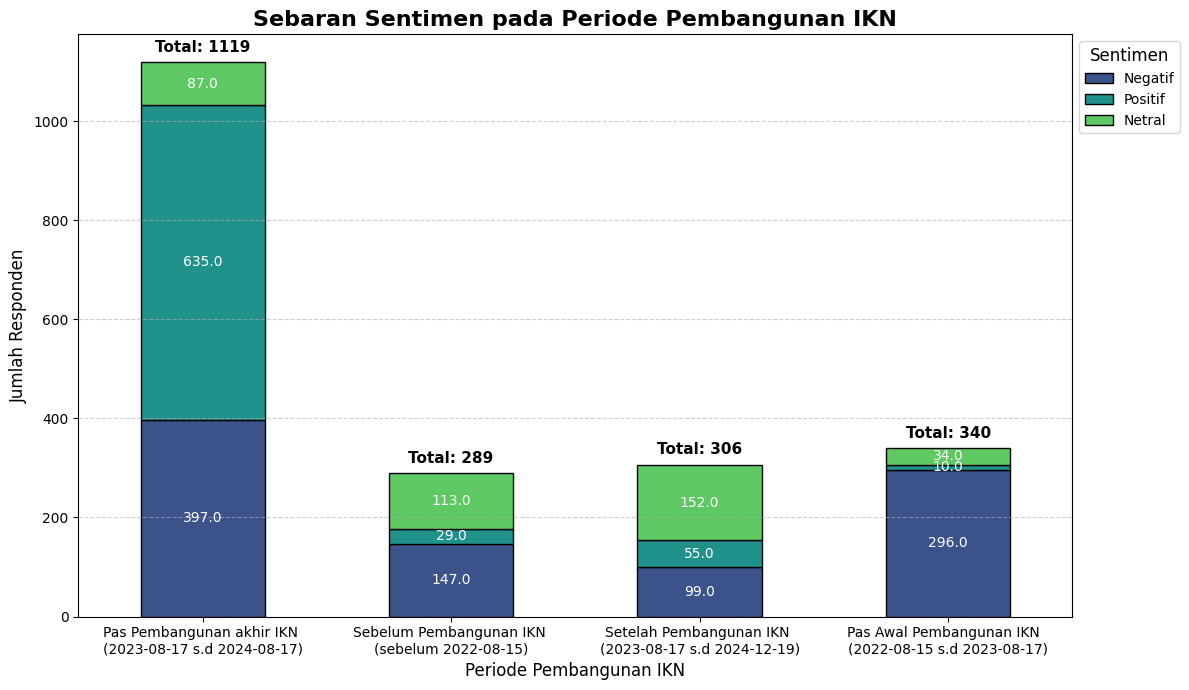

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data periode dan sentimen
data = {
    'Pas Pembangunan akhir IKN \n(2023-08-17 s.d 2024-08-17)': {'Negatif': 397, 'Positif': 635, 'Netral': 87},
    'Sebelum Pembangunan IKN \n(sebelum 2022-08-15)': {'Negatif': 147, 'Positif': 29, 'Netral': 113},
    'Setelah Pembangunan IKN \n(2023-08-17 s.d 2024-12-19)': {'Negatif': 99, 'Positif': 55, 'Netral': 152},
    'Pas Awal Pembangunan IKN  \n(2022-08-15 s.d 2023-08-17)': {'Negatif': 296, 'Positif': 10, 'Netral': 34},
}

# Membuat DataFrame dari data
df = pd.DataFrame(data).T

# Warna untuk setiap label sentimen menggunakan palet viridis
viridis_colors = sns.color_palette("viridis", n_colors=3)

# Plot stacked bar chart
ax = df.plot(kind='bar', stacked=True, color=viridis_colors, figsize=(12, 7), edgecolor='black')

# Menambahkan anotasi untuk setiap batang (nilai sentimen pada setiap bar)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='white')

# Tambahkan total jumlah responden di atas setiap grup batang
for j, total in enumerate(df.sum(axis=1)):
    ax.text(
        j, total + 15, f"Total: {total}",
        ha='center', va='bottom', fontsize=11, fontweight="bold", color="black"
    )

# Atur tampilan grafik
plt.title('Sebaran Sentimen pada Periode Pembangunan IKN', fontsize=16, fontweight='bold')
plt.xlabel('Periode Pembangunan IKN', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sentimen', fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

# Tambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tata letak grafik lebih rapi
plt.tight_layout()

# Tampilkan plot
plt.show()


,created_at,full_text,Label,tokenize text,stop removal text,stemmed_text,kategori_pembangunan
0,2024-01-31 21:21:49,baru tau aneh kan terus masih mau bangun ikn m...,0.0,"['baru', 'tau', 'aneh', 'kan', 'terus', 'masih...","['baru', 'tau', 'aneh', 'kan', 'terus', 'mau',...",baru tau aneh kan terus mau bangun ikn makan g...,Pas Pembangunan akhir IKN
1,2024-03-26 15:43:32,intinya tetap salah pemerintah sih kenapa akse...,0.0,"['intinya', 'tetap', 'salah', 'pemerintah', 's...","['intinya', 'tetap', 'salah', 'pemerintah', 's...",inti tetap salah perintah sih akses jalan jele...,Pas Pembangunan akhir IKN
2,2024-01-31 04:27:47,maksudnya berkelanjutan fod estate gagal hilir...,0.0,"['maksudnya', 'berkelanjutan', 'fod', 'estate'...","['maksudnya', 'berkelanjutan', 'fod', 'estate'...",maksud lanjut fod estate gagal hilir nikel ruw...,Pas Pembangunan akhir IKN
3,2024-03-28 02:29:49,lah kan itu salah satu dosanya apa mau disebut...,0.0,"['lah', 'kan', 'itu', 'salah', 'satu', 'dosany...","['lah', 'kan', 'salah', 'satu', 'dosanya', 'ap...",lah kan salah satu dosa apa mau sebut semua fo...,Pas Pembangunan akhir IKN
4,2024-03-27 08:40:25,ribet karena ada ikn bayangkan ikn gagal,0.0,"['ribet', 'karena', 'ada', 'ikn', 'bayangkan',...","['ribet', 'ada', 'ikn', 'bayangkan', 'ikn', 'g...",ribet ada ikn bayang ikn gagal,Pas Pembangunan akhir IKN
...,...,...,...,...,...,...,...
2049,2022-03-06 13:31:48,oposisi yang tidak tahu malu paling kencang to...,2.0,"['oposisi', 'yang', 'tidak', 'tahu', 'malu', '...","['oposisi', 'tidak', 'tahu', 'malu', 'paling',...",oposisi tidak tahu malu paling kencang tolak i...,Sebelum Pembangunan IKN
2050,2022-03-06 13:31:32,lah jare wingi sama sekali tidak setuju dengan...,0.0,"['lah', 'jare', 'wingi', 'sama', 'sekali', 'ti...","['lah', 'jare', 'wingi', 'sama', 'sekali', 'se...",lah jare wing sama sekali tuju ikn lo kok sodo...,Sebelum Pembangunan IKN
2051,2022-03-06 13:31:10,partai keadilan sejahtera kalau suruh anis jad...,0.0,"['partai', 'keadilan', 'sejahtera', 'kalau', '...","['partai', 'keadilan', 'sejahtera', 'kalau', '...",partai adil sejahtera kalau suruh anis jadi ko...,Sebelum Pembangunan IKN
2052,2022-03-06 13:30:18,wih baru muncul lagi nih bro ngabalin posisi k...,0.0,"['wih', 'baru', 'muncul', 'lagi', 'nih', 'bro'...","['wih', 'baru', 'muncul', 'nih', 'bro', 'ngaba...",wih baru muncul nih bro ngabalin posisi kepala...,Sebelum Pembangunan IKN


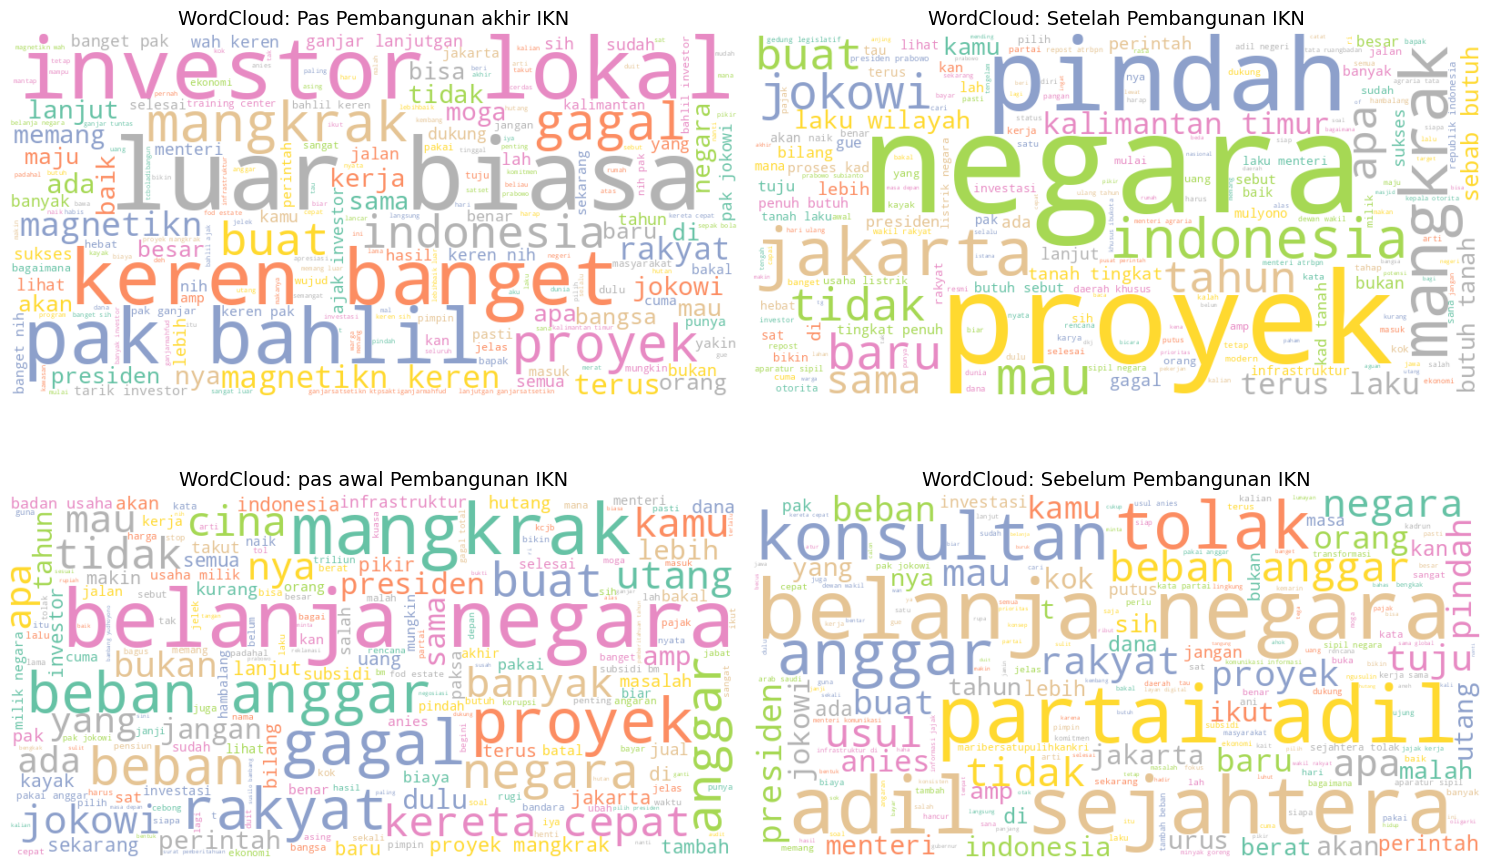

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Asumsi data adalah DataFrame Anda dan 'kategori_pembangunan' adalah kolom yang menunjukkan periode masing-masing.
# Kita akan mengelompokkan data berdasarkan 'kategori_pembangunan' dan membuat wordcloud untuk setiap periode.
periode_labels = b['kategori_pembangunan'].unique()  # Menemukan label periode yang unik

# Daftar kata yang ingin dihapus dari WordCloud
stopwords = set(['ikn', 'ibu', 'kota', 'nusantara','jadi','dapat', 'kalau', 'bangun'])

# Buat subplots untuk menampilkan 4 WordCloud
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Warna untuk setiap plot (untuk variasi estetika)
colors = ['#FF8383', '#FFF574', '#A1D6CB', '#D8A1E4']

# Loop untuk setiap periode dan buat WordCloud
for idx, periode in enumerate(periode_labels):
    # Ambil data untuk periode ini
    data_periode = b[b['kategori_pembangunan'] == periode]

    # Gabungkan semua teks dalam 'stemmed_text' untuk periode ini
    text_combined = " ".join(data_periode['stemmed_text'].dropna())

    # Membuat wordcloud untuk periode ini
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Set2',
        stopwords=stopwords,  # Menghapus kata-kata yang tidak diinginkan
        contour_color='black',  # Menambahkan border dengan warna hitam
        contour_width=3  # Menentukan ketebalan border
    ).generate(text_combined)

    # Pilih subplot berdasarkan index dan tampilkan WordCloud
    ax = axes[idx // 2, idx % 2]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'WordCloud: {periode}', fontsize=14)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
k = pd.read_csv("/content/ikn 22 sebelum pembangunan.csv")
k

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1503305479157559297,Mon Mar 14 09:42:10 +0000 2022,5548,Seluruh gubernur atau yang mewakili dari 34 pr...,1503305479157559297,https://pbs.twimg.com/media/FNzQXGrVsAA-sOZ.jpg,NaN,in,Jakarta,339,652,850,https://x.com/jokowi/status/1503305479157559297,366987179,jokowi
1,1503381764709883905,Mon Mar 14 14:45:18 +0000 2022,5098,Duduk melingkar di sekitar Titik Nol Ibu Kota ...,1503381764709883905,https://pbs.twimg.com/media/FN0Vv1eVUAAhmOS.jpg,NaN,in,Jakarta,82,395,484,https://x.com/jokowi/status/1503381764709883905,366987179,jokowi
2,1503401585715539974,Mon Mar 14 16:04:04 +0000 2022,637,Detik-detik presiden Jokowi menikmati malam di...,1503401585715539974,https://pbs.twimg.com/ext_tw_video_thumb/15034...,NaN,in,NaN,9,18,117,https://x.com/MurtadhaOne1/status/150340158571...,1178950184601935873,MurtadhaOne1
3,1502800872845504512,Sun Mar 13 00:17:03 +0000 2022,940,Riwayat janji dana pembiayaan IKN : 1) Soft Ba...,1502800872845504512,https://pbs.twimg.com/media/FNsFa4qacAMSc1h.jpg,NaN,in,NaN,33,168,330,https://x.com/msaid_didu/status/15028008728455...,1117990249806721024,msaid_didu
4,1503333025005809670,Mon Mar 14 11:31:38 +0000 2022,3096,Batalnya investasi Softbank seharusnya membang...,1503333025005809670,https://pbs.twimg.com/media/FNzpMd7VEAMeFK4.jpg,NaN,in,Indonesia,180,321,1302,https://x.com/korantempo/status/15033330250058...,20963426,korantempo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1502520130118762496,Sat Mar 12 05:41:29 +0000 2022,230,ไม่ห่างกันเลยเว้ยสองคนนี้ #เตนิว #AISCallingMe...,1502520130118762496,https://pbs.twimg.com/media/FNoGF67aUAQN03i.jpg,NaN,th,TAYNEW BKPP MIX,2,1,148,https://x.com/InknknkInk_/status/1502520130118...,1134445803873886211,InknknkInk_
349,1502662044029698055,Sat Mar 12 15:05:24 +0000 2022,329,กรี๊ดดดดดดดด ไอค่อนทั้งร้องและเต้นโคฟเวอร์เลย ...,1502662044029698055,https://pbs.twimg.com/ext_tw_video_thumb/15026...,NaN,th,NaN,3,0,655,https://x.com/CherryZenz/status/15026620440296...,380269086,CherryZenz
350,1502636902473957379,Sat Mar 12 13:25:29 +0000 2022,413,#เตนิว : ขอให้เหมือนเดิม คุณพี : ได้โปรด พี่ออ...,1502636902473957379,https://pbs.twimg.com/ext_tw_video_thumb/15026...,NaN,th,TAYNEW BKPP MIX,10,1,416,https://x.com/InknknkInk_/status/1502636902473...,1134445803873886211,InknknkInk_
351,1501824102645960706,Thu Mar 10 07:35:43 +0000 2022,272,ก็2วันติดไปเลยสิค้าาาาาาาา เตรียมรับโมเม้นจุกๆ...,1501824102645960706,https://pbs.twimg.com/media/FNeNDxFVUAAd9y1.jpg,NaN,th,TAYNEW BKPP MIX,3,0,220,https://x.com/InknknkInk_/status/1501824102645...,1134445803873886211,InknknkInk_


<ipython-input-63-d244787e6a30>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_counts, x='Label', y='Jumlah', palette='viridis')


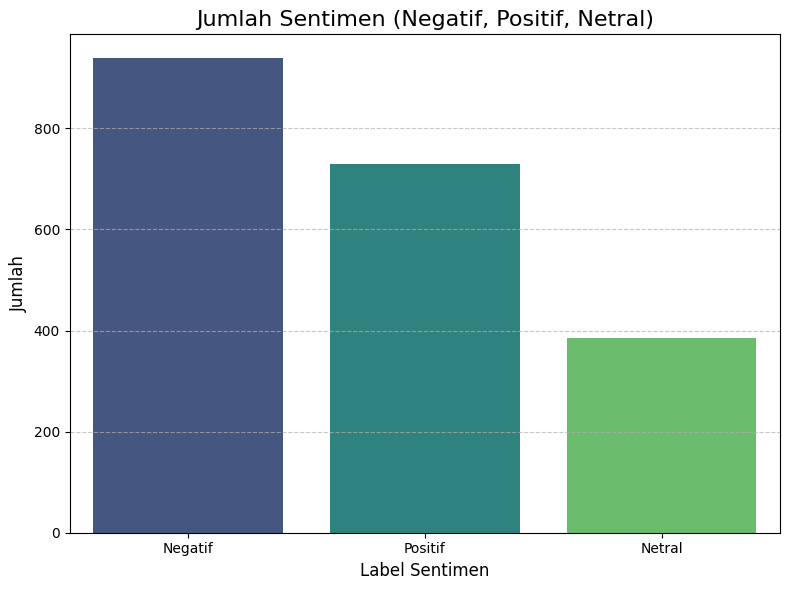

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan data Anda sudah ada dalam DataFrame dengan nama 'b'

# 1. Map angka ke label sentimen
label_mapping = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
b['Label'] = b['Label'].map(label_mapping)

# 2. Hitung jumlah setiap label (Negatif, Positif, Netral)
label_counts = b['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Jumlah']

# 3. Plot bar chart menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=label_counts, x='Label', y='Jumlah', palette='viridis')

# 4. Atur grafik
plt.title('Jumlah Sentimen (Negatif, Positif, Netral)', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.tight_layout()
plt.show()
